# Exploration

## Imports

In [1]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# moduels
import explore_module as e 

# data
# evictions cases
edf = pd.read_excel('evictions_prepared.xlsx')

# 311 homelessness requests
rdf = pd.read_excel('requests_prepared.xlsx')

## Eviction Case Data

In [2]:
edf.head()

,case_number,judgement_date,zip_code,disposition
0,41E2407310,2024-12-19,78223,Judgment for Plaintiff (OCA)
1,21E2407657,2024-12-19,78229,Default Judgments (OCA)
2,21E2407655,2024-12-19,78229,Default Judgments (OCA)
3,21E2407654,2024-12-19,78229,Default Judgments (OCA)
4,21E2407650,2024-12-19,78251,Default Judgments (OCA)


## 311 Requests Data

In [3]:
rdf.head()

,open_date,type,latitude,longitude,zip_code
0,2023-10-20,Homeless Encampment,29.444219,-98.516167,78201
1,2023-11-02,Homeless Encampment,29.351602,-98.534868,78224
2,2023-11-06,Homeless Encampment,29.535004,-98.541934,78230
3,2023-11-28,Homeless Encampment,29.461083,-98.569024,78228
4,2023-12-04,Homeless Encampment,29.528313,-98.556656,78230


## Is there enough time overlap in the evictions and requests data to make for a good comparison?
* Evictions data cover all of 2024
* Requests data cover from late 2023 to early 2025
* Data will be compared using eviction cases and homelessness requests made during 2024

In [4]:
# getting comp readout of min and max time for each dataframe
rdf = e.time_stamp(edf,rdf)

rdf.head()

The eviction dataframe contains data from
2024-01-02 00:00:00
to
2024-12-19 00:00:00

The requests dataframe contains data from
2023-10-20 00:00:00
to
2025-04-12 00:00:00

Trimming request data to include only 2024
exporting to requests_2024


,open_date,type,latitude,longitude,zip_code
12,2024-01-03,Homeless Encampment,29.427353,-98.503727,78207
13,2024-01-03,Homeless Encampment,29.448031,-98.707380,78251
14,2024-01-04,Homeless Encampment,29.524882,-98.410335,78217
15,2024-01-04,Homeless Encampment,29.428445,-98.452225,78202
16,2024-01-05,Homeless Encampment,29.476837,-98.588266,78228


## What different types of homelessness related 311 request were made in 2024 and how are they distributed in the data?
* The near totality of requests related to homeless encampments
* A very small portion of requests are for homeless outreach


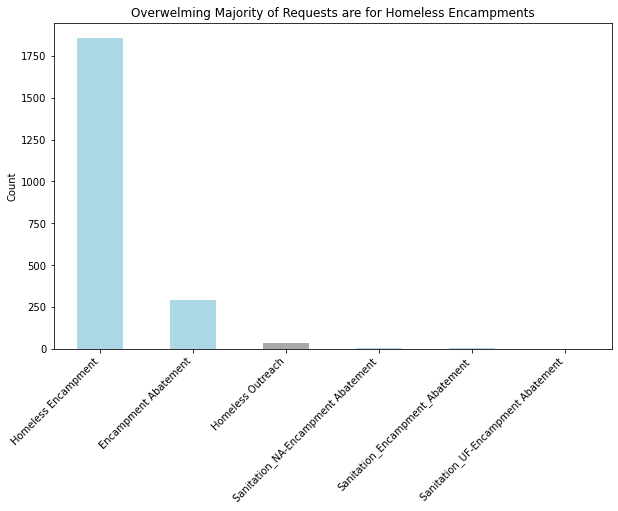

In [5]:
e.get_request_bar(rdf)

## Are 311 homelessness requests a good measure of the overall homeless population?
* It stands to reason that a larger homeless population would result in larger and more frequent homeless encampments which would in turn result in a larger number of encampment related 311 requests. For this reason tracking changes in the homeless population using these requests seems reasonable.
* It is unclear how multiple requests regarding the same encampment are tracked or if they are tracked. This may muddy the results but not enough to discount this as a measure
* Overall I believe that changes in homelessness requests will serve as a good, if imperfect, measure of changes in the homeless population


## What is the distribution of judgements for cases being used to track evictions and are these cases a good measure of total evictions?
* Only cases with judgements for the plaintiff or default judgements were included
* Eviction cases that rule in favor of the plaintiff begin the process of a tenant being evicted
* Default judgements are awarded in the event that one of the parties failing to appear at court. Because the plaintiff would need to file a case for one to exist in the first place it is likely that the grand majority of these cases were in favor of the plaintiff and began an eviction process
* It stands to reason that cases with either judgement as it’s most recent judgement represent an instance of one or more persons being evicted
* Tenants cannot lawfully be evicted in San Antonio without filing for evictions
* Informal evictions such as those between family members may not go through a formal eviction process and so will not appear in our data
* While we cannot capture all evictions in our data it stands to reason that changes in eviction case numbers will, if imperfactly, reflect changes in the total number of evictions and so it is a good measure to use

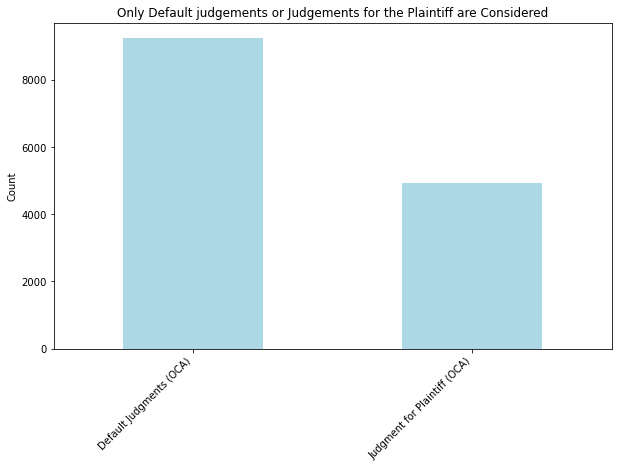

In [6]:
e.get_case_bar(edf)

## Is there a correlation between eviction cases and 311 homelessness requests?
* Information from the requests and eviction data was combined to gather the number of homelessness requests and eviction cases per zip code in San Antonio in 2024
* A scatterplot and correlation test of homelessness requests and eviction cases by zip code shows a strong correlation between the two that is statistically significant

### Comparison Dataframe

In [7]:
# making comparison dataframe
zipdf, rdf, edf = e.get_zip_compare(edf,rdf)
    
zipdf.head()

,zip_code,homelessness_requests,eviction_cases
0,78201,228,388
1,78202,27,177
2,78203,9,31
3,78204,48,72
4,78205,22,20


### Scatterplot and Pearson's r Result

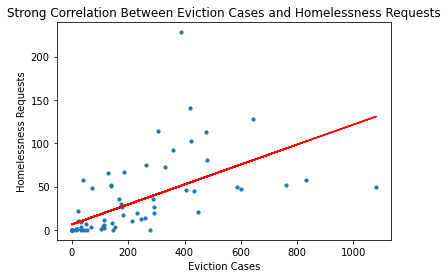

Correlation Coefficient: 0.6240280503952236
P-value: 6.433703413332502e-11


In [8]:
# gatting scatterplot and p
e.get_zip_scatter(zipdf)

## Conclusion
* Fluxuations in the number of 311 calls related to homelessness seem to be a good indicator of fluctuations in the homeless population
* Fluxuations in the number of eviction cases with judgements likely leading to evictions seems to be a good indicator of fluctuations in the total number of evictions
* There is a strong correlation between the number of eviction cases and the number of 311 calls related to homelessness in San Antonio in 2024
* This suggests a link between evictions and homelessness
* All available evidence suggests that evictions is a driver of homelessness

## Further Inquiry
* Because the evidence we have is correlatory we cannot rule out the possibility that evictions and homelessness are both independently driven by third variable such as population
* More research into this possibility should be conducted in the future